In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import os
from pathlib import Path
import sys


/tmp/ipykernel_8063/376926263.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Coleta da taxa de retorno risk free

def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1/periods) - 1

annualized = yf.download("^IRX", start="1995-01-01", end="2023-12-31")["Adj Close"]
daily = annualized.apply(deannualize)

# create dataframe
risk_free_rates = pd.DataFrame({"annualized": annualized, "daily": daily})
risk_free_rates['daily'] = risk_free_rates['daily'] / 100
print(np.shape(risk_free_rates))
risk_free_rates.head()

/home/marcelo/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

(7282, 2)


,annualized,daily
Date,,
1995-01-03,5.52,0.000051
1995-01-04,5.69,0.000052
1995-01-05,5.71,0.000052
1995-01-06,5.74,0.000052
1995-01-09,5.75,0.000052


In [3]:
# Usando Google Colab:
'''
from google.colab import drive

drive.mount('/content/drive')
pasta = str("/content/drive/MyDrive/Python/TCC-Cloud/Distancia-Cointegração/result_cointegracao/")
pasta
'''

'\nfrom google.colab import drive\n\ndrive.mount(\'/content/drive\')\npasta = str("/content/drive/MyDrive/Python/TCC-Cloud/Distancia-Cointegração/result_cointegracao/")\npasta\n'

In [4]:
# No computador:
pasta = str(Path.cwd().parents[0]) + ("/Distancia-Cointegração/result_cointegracao/")
pasta

'/mnt/c/Users/MarceloPolecram/Python/MEU_TCC/Distancia-Cointegração/result_cointegracao/'

In [5]:
# Dataframes:
operations10 = pd.read_csv(pasta + "operations_C10.csv")
operations5 = pd.read_csv(pasta + "operations_C5.csv")
operations20 = pd.read_csv(pasta + "operations_C20.csv")
operations100 = pd.read_csv(pasta + "operations_C100.csv")

# Top 100 Pares
print("Operações com 100 pares:")
operations100['Pair'] = operations100['Ticker 1'] + "-" + operations100['Ticker 2']
print(operations100.tail())

# Top 20 Pares
print("\nOperações com 20 pares:")
operations20['Pair'] = operations20['Ticker 1'] + "-" + operations20['Ticker 2']
print(operations20.tail())

# Top 10 Pares
print("\nOperações com 10 pares:")
operations10['Pair'] = operations10['Ticker 1'] + "-" + operations10['Ticker 2']
print(operations10.tail())

# Top 5 Pares
print("\nOperações com 5 pares:")
operations5['Pair'] = operations5['Ticker 1'] + "-" + operations5['Ticker 2']
print(operations5.tail())

Operações com 100 pares:
      Operação  Semestre  Abertura  Fechamento  Dias  Retorno total Ticker 1  \
5835         2        54        42          91    49       0.120807    ABEV3   
5836         3        54       118         127     9       0.009739    ABEV3   
5837         1        54        42          92    50       0.179402    BBDC3   
5838         2        54       119         127     8      -0.037799    BBDC3   
5839         1        54         1          51    50       0.098997    RDOR3   

     Ticker 2  Converged          Index  Retorno total - exp         Pair  
5835    TELB3       True  ABEV3-TELB3-2             1.128407  ABEV3-TELB3  
5836    TELB3      False  ABEV3-TELB3-3             1.009786  ABEV3-TELB3  
5837    TELB3       True  BBDC3-TELB3-1             1.196502  BBDC3-TELB3  
5838    TELB3      False  BBDC3-TELB3-2             0.962906  BBDC3-TELB3  
5839    CSAN3       True  RDOR3-CSAN3-1             1.104062  RDOR3-CSAN3  

Operações com 20 pares:
      Operaçã

In [20]:
def print_ops(operations):
    operations_by_pair = operations.groupby("Pair").sum("Retorno total")
    
    #print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
    print(f"Número de operações: {np.shape(operations)[0]}")
    print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
    print(f"Positive Returns: {sum(operations['Retorno total'] > 0)}\nNegative: {sum(operations['Retorno total'] < 0)}")
    print(f"Average trade lenght: {operations['Dias'].mean()}")
    print(f"Convergência: {(operations['Converged'].sum()/np.shape(operations)[0])*100} %")
    print(f"Highest Return: {round(100*operations['Retorno total'].max(),4)} %")
    print(f"Lowest Return: {round(100*operations['Retorno total'].min(),4)} %")
    print(f"Average Return: {round(100*operations['Retorno total'].mean(),4)} %")   
    print(f"Retorno médio por par: {round(100*operations_by_pair['Retorno total'].mean(),4)} %")
    print(f"Retorno médio por par por semestre: {round(np.divide(100*operations_by_pair['Retorno total'].mean(),max(operations['Semestre'])+1),4)} %")

In [21]:
print("Operações com 100 pares:")
print_ops(operations100)
print("\nOperações com 20 pares:")
print_ops(operations20)
print("\nOperações com 10 pares:")
print_ops(operations10)
print("\nOperações com 5 pares:")
print_ops(operations5)

Operações com 100 pares:
Número de operações: 5840
Número de pares: 3237
Positive Returns: 5173
Negative: 523
Average trade lenght: 18.159246575342465
Convergência: 71.0445205479452 %
Highest Return: 482.814 %
Lowest Return: -84.1592 %
Average Return: 18.76 %
Retorno médio por par: 33.8457 %
Retorno médio por par por semestre: 0.6154 %

Operações com 20 pares:
Número de operações: 1250
Número de pares: 797
Positive Returns: 1102
Negative: 99
Average trade lenght: 16.8672
Convergência: 71.76 %
Highest Return: 482.814 %
Lowest Return: -40.3247 %
Average Return: 18.2811 %
Retorno médio por par: 28.6718 %
Retorno médio por par por semestre: 0.5213 %

Operações com 10 pares:
Número de operações: 653
Número de pares: 411
Positive Returns: 571
Negative: 47
Average trade lenght: 16.551301684532923
Convergência: 72.89433384379785 %
Highest Return: 371.3265 %
Lowest Return: -40.3247 %
Average Return: 17.4252 %
Retorno médio por par: 27.6852 %
Retorno médio por par por semestre: 0.5034 %

Operaçõ

In [8]:
# Return Distribution
def print_ret(operations):
  fig = plt.figure(figsize=(15, 7))
  ax1 = fig.add_subplot(1, 1, 1)
  operations['Retorno total'].hist(bins=50, ax=ax1)
  ax1.set_xlabel('Retorno')
  ax1.set_ylabel('Amostra')
  ax1.set_title('Distribuição dos Retornos')
  plt.show()


Operações com 100 pares:


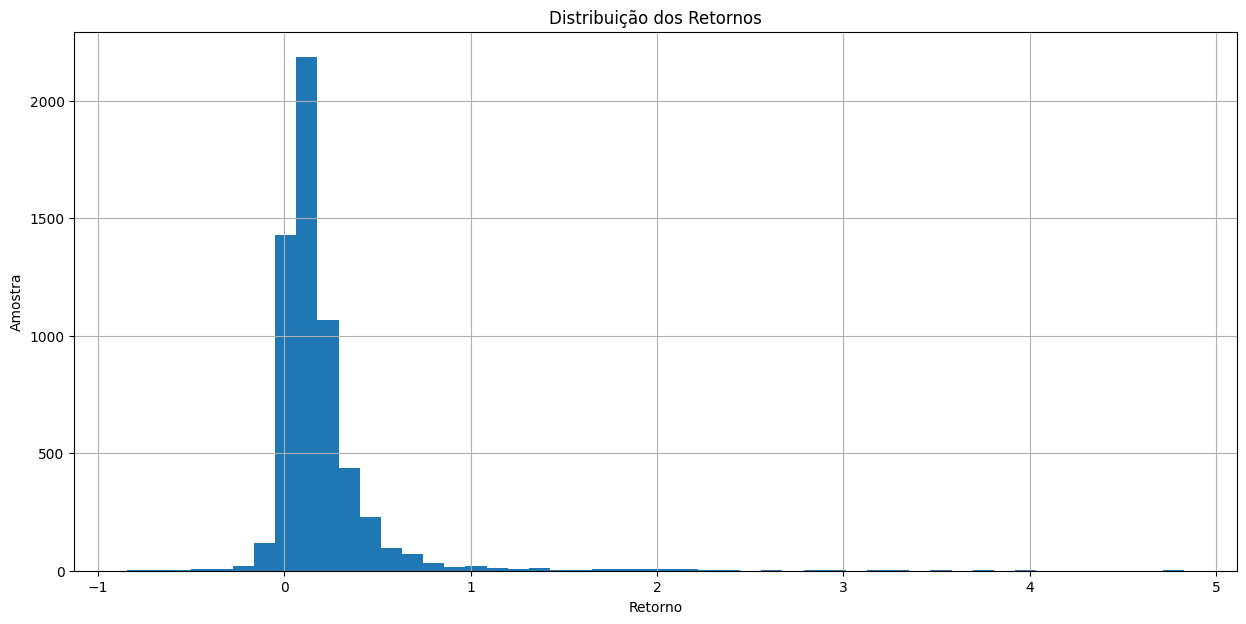


Operações com 20 pares:


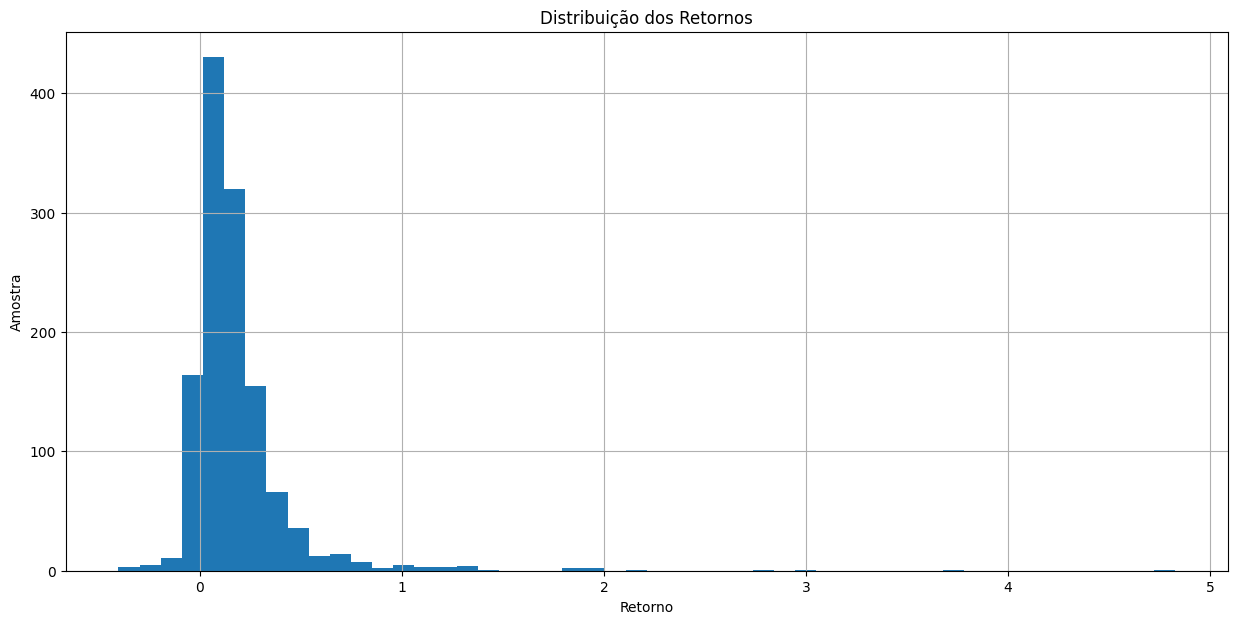


Operações com 10 pares:


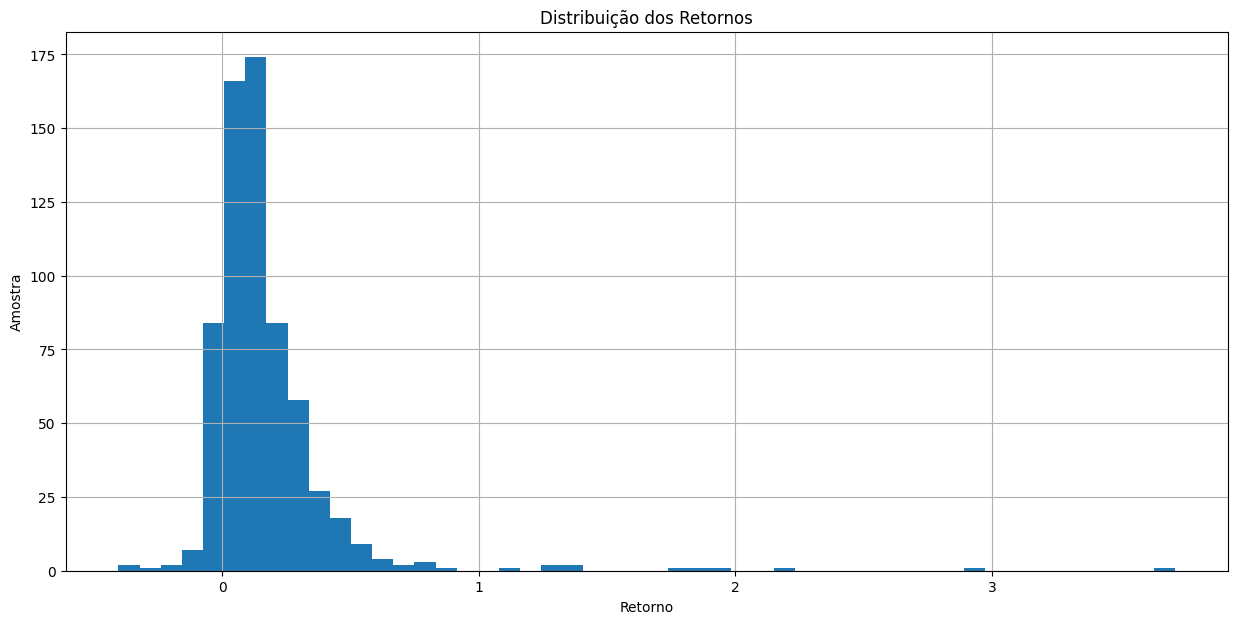


Operações com 5 pares:


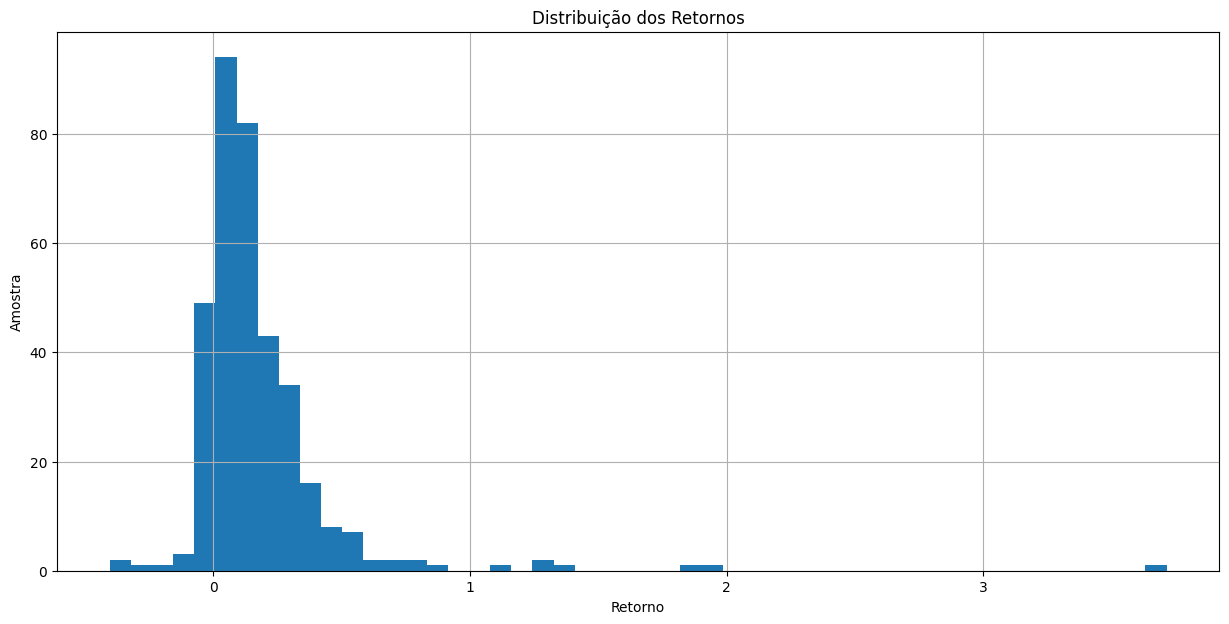

In [9]:
print("Operações com 100 pares:")
print_ret(operations100)
print("\nOperações com 20 pares:")
print_ret(operations20)
print("\nOperações com 10 pares:")
print_ret(operations10)
print("\nOperações com 5 pares:")
print_ret(operations5)

In [10]:
# Ações com maior participação
def participacoes(operations):
  stock_count = {}
  operations_by_pair = operations.groupby("Pair").sum("Retorno total")
  for pair in operations_by_pair.index:
      stocks = pair.split("-")
      for stock in stocks:
          if stock in stock_count:
              stock_count[stock] += 1
          else:
              stock_count[stock] = 1
  stock_count_df = pd.DataFrame(stock_count.items())
  stock_count_df = stock_count_df.sort_values(1)
  stock_count_df.to_csv(pasta + "stock_count_20_pairs.csv")
  print(stock_count_df)

In [11]:
print("Operações com 100 pares:")
participacoes(operations100)
print("\nOperações com 20 pares:")
participacoes(operations20)
print("\nOperações com 10 pares:")
participacoes(operations10)
print("\nOperações com 5 pares:")
participacoes(operations5)

Operações com 100 pares:
          0   1
201  BIDI11   1
196   USIM6   1
198   PETZ3   1
203   RDOR3   2
205   TSPC6   2
..      ...  ..
158   BBDC4  84
45    VIVT3  87
33    RSID3  88
37    TELB3  93
38    TELB4  97

[207 rows x 2 columns]

Operações com 20 pares:
         0   1
188  WEGE3   1
139  TRJC6   1
141  EBTP4   1
119  ALLL3   1
115  CIEL3   1
..     ...  ..
12   ITSA4  27
4    BBDC3  28
51   USIM3  30
24   TELB3  33
25   TELB4  38

[189 rows x 2 columns]

Operações com 10 pares:
          0   1
171   YDUQ3   1
142  KLBN11   1
159   PCAR3   1
117   TPRC6   1
116   EBTP4   1
..      ...  ..
7     ITSA4  15
59    USIM3  16
6     CPFE3  16
18    TELB4  22
77    TELB3  24

[172 rows x 2 columns]

Operações com 5 pares:
         0   1
72   TSEP4   1
100  IGTA3   1
99   HYPE3   1
98   TRPL4   1
97   LCAM3   1
..     ...  ..
38   ELET3   8
5    ITSA4   9
4    CPFE3  11
50   TELB3  12
51   TELB4  13

[146 rows x 2 columns]


In [22]:
print("Top pares com 5 pares:")
contagem_nomes = operations5['Pair'].value_counts()
print(contagem_nomes.head(5))
print("\nTop pares com 10 pares:")
contagem_nomes = operations10['Pair'].value_counts()
print(contagem_nomes.head(5))
print("\nTop pares com 20 pares:")
contagem_nomes = operations20['Pair'].value_counts()
print(contagem_nomes.head(5))
print("\nTop pares com 100 pares:")
contagem_nomes = operations100['Pair'].value_counts()
print(contagem_nomes.head(5))

Top pares com 5 pares:
Pair
EBTP3-EBTP4    19
TELB3-TELB4    10
BRKM5-TELB3     9
VIVT3-VIVT4     8
ELET3-ELET6     8
Name: count, dtype: int64

Top pares com 10 pares:
Pair
EBTP3-EBTP4    19
VIVT3-VIVT4    12
TELB3-TELB4    10
BRKM5-TELB3     9
ELET3-ELET6     9
Name: count, dtype: int64

Top pares com 20 pares:
Pair
EBTP3-EBTP4    19
VIVT3-VIVT4    12
TELB3-TELB4    10
ELET3-ELET6     9
BRKM5-TELB3     9
Name: count, dtype: int64

Top pares com 100 pares:
Pair
EBTP3-EBTP4    27
VIVT3-VIVT4    21
TELB3-TELB4    16
ARCE3-ARCE4    13
GGBR4-GOAU4    12
Name: count, dtype: int64


In [12]:
'''
def rate_interest(principal, final_amount, time):
    rate = (100 * (final_amount/principal)**(1/time)) - 100
    print("Compound interest rate is", rate, "%")

daily_returns = pd.read_csv(pasta + "daily_returns.csv")
daily_returns = daily_returns.iloc[252:,:]
daily_returns = daily_returns / 35
cumulative = np.cumprod(1+daily_returns)
cumulative.plot()
rate_interest(1,cumulative.values[-1],25)
'''

'\ndef rate_interest(principal, final_amount, time):\n    rate = (100 * (final_amount/principal)**(1/time)) - 100\n    print("Compound interest rate is", rate, "%")\n\ndaily_returns = pd.read_csv(pasta + "daily_returns.csv")\ndaily_returns = daily_returns.iloc[252:,:]\ndaily_returns = daily_returns / 35\ncumulative = np.cumprod(1+daily_returns)\ncumulative.plot()\nrate_interest(1,cumulative.values[-1],25)\n'

In [13]:
'''
# Cálculo do Sharpe para o período do estudo
mean_daily_return = daily_returns.values.mean()
print(f"Mean daily return: {mean_daily_return}")
returns_std_dev = daily_returns.values.std()

risk_free_mean = risk_free_rates['daily'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Fully Invested Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")
'''

'\n# Cálculo do Sharpe para o período do estudo\nmean_daily_return = daily_returns.values.mean()\nprint(f"Mean daily return: {mean_daily_return}")\nreturns_std_dev = daily_returns.values.std()\n\nrisk_free_mean = risk_free_rates[\'daily\'].mean()\nprint(f"Mean risk free return: {risk_free_mean}")\n\nprint(f"Fully Invested Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")\n'

Rascunho

In [14]:
operations20['Retorno total'].sum()

228.51398774375716

In [15]:
'''# prompt: Usando o DataFrame operations: plot operations['Retorno total'] as a time series

import pandas as pd

# convert 'Semestre' column to datetime
#operations['Semestre'] = pd.to_datetime(operations['Semestre'].astype(str) + '-01-01')

# create the plot
import altair as alt
alt.Chart(operations).mark_line().encode(
    x='Semestre',
    y='Retorno total'
)
'''

"# prompt: Usando o DataFrame operations: plot operations['Retorno total'] as a time series\n\nimport pandas as pd\n\n# convert 'Semestre' column to datetime\n#operations['Semestre'] = pd.to_datetime(operations['Semestre'].astype(str) + '-01-01')\n\n# create the plot\nimport altair as alt\nalt.Chart(operations).mark_line().encode(\n    x='Semestre',\n    y='Retorno total'\n)\n"